<a href="https://colab.research.google.com/github/ManasaCherukupally1/Manasa_INFO5731_Spring2023/blob/main/Cherukupally_Exercise_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 4/18/2023)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training.

The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.

Algorithms:

(1) MultinominalNB

(2) SVM

(3) KNN

(4) Decision tree

(5) Random Forest

(6) XGBoost

(7) Word2Vec

(8) BERT

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison

(4) F-1 score

In [3]:

#Fetching train and test data
import pandas as pd

# Read text data from the .txt file
with open('/content/stsa-train.txt', 'r') as file:
    data = file.readlines()

# Splitting data into text and labels
text_data = []
labels = []
for entry in data:
    label, text = entry.split(' ', 1)
    labels.append(int(label))
    text_data.append(text.strip())  # Removing leading/trailing whitespaces

# Creating a DataFrame
df_train = pd.DataFrame({'reviews': text_data, 'label': labels})

# Display the DataFrame
print(df_train)


                                                reviews  label
0     a stirring , funny and finally transporting re...      1
1     apparently reassembled from the cutting-room f...      0
2     they presume their audience wo n't sit still f...      0
3     this is a visually stunning rumination on love...      1
4     jonathan parker 's bartleby should have been t...      1
...                                                 ...    ...
6915  painful , horrifying and oppressively tragic ,...      1
6916  take care is nicely performed by a quintet of ...      0
6917  the script covers huge , heavy topics in a bla...      0
6918  a seriously bad film with seriously warped log...      0
6919  a deliciously nonsensical comedy about a city ...      1

[6920 rows x 2 columns]


In [4]:
# Read text data from the .txt file
with open('/content/stsa-test.txt', 'r') as file:
    data = file.readlines()

# Splitting data into text and labels
text_data = []
labels = []
for entry in data:
    label, text = entry.split(' ', 1)
    labels.append(int(label))
    text_data.append(text.strip())  # Removing leading/trailing whitespaces

# Creating a DataFrame
df_test = pd.DataFrame({'reviews': text_data, 'label': labels})

# Display the DataFrame
print(df_test)

                                                reviews  label
0        no movement , no yuks , not much of anything .      0
1     a gob of drivel so sickly sweet , even the eag...      0
2     gangs of new york is an unapologetic mess , wh...      0
3     we never really feel involved with the story ,...      0
4               this is one of polanski 's best films .      1
...                                                 ...    ...
1816  an often-deadly boring , strange reading of a ...      0
1817  the problem with concept films is that if the ...      0
1818  safe conduct , however ambitious and well-inte...      0
1819  a film made with as little wit , interest , an...      0
1820  but here 's the real damn : it is n't funny , ...      0

[1821 rows x 2 columns]


In [5]:
#Cleaning the data
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word
import pandas as pd
nltk.download('stopwords')
nltk.download('wordnet')

# Function for preprocessing data
def preprocess_reviews_data(reviews):
    # Removing punctuation
    reviews = reviews.str.replace('[^\w\s]', '')

    # Removing stopwords
    stop = stopwords.words('english')
    reviews = reviews.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

    # Remove numbers
    reviews = reviews.apply(lambda x: " ".join(x for x in x.split() if not x.isdigit()))

    # Convert to lowercase
    reviews = reviews.apply(lambda x: " ".join(x.lower() for x in x.split()))

    # Stemming
    st = PorterStemmer()
    reviews = reviews.apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

    # Lemmatization
    reviews = reviews.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

    return reviews

df_train = df_train.dropna(subset=['reviews'])

# Apply the preprocessing function
df_train['Cleaned_reviews'] = preprocess_reviews_data(df_train['reviews'])

# Display the DataFrame with the cleaned text
print(df_train)

df_test = df_test.dropna(subset=['reviews'])

# Apply the preprocessing function
df_test['Cleaned_reviews'] = preprocess_reviews_data(df_test['reviews'])

# Display the DataFrame with the cleaned text
print(df_test)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-5-af4a6bf9d111>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews = reviews.str.replace('[^\w\s]', '')


                                                reviews  label  \
0     a stirring , funny and finally transporting re...      1   
1     apparently reassembled from the cutting-room f...      0   
2     they presume their audience wo n't sit still f...      0   
3     this is a visually stunning rumination on love...      1   
4     jonathan parker 's bartleby should have been t...      1   
...                                                 ...    ...   
6915  painful , horrifying and oppressively tragic ,...      1   
6916  take care is nicely performed by a quintet of ...      0   
6917  the script covers huge , heavy topics in a bla...      0   
6918  a seriously bad film with seriously warped log...      0   
6919  a deliciously nonsensical comedy about a city ...      1   

                                        Cleaned_reviews  
0     stir funni final transport reimagin beauti bea...  
1     appar reassembl cuttingroom floor given daytim...  
2     presum audienc wo nt sit st

<ipython-input-5-af4a6bf9d111>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews = reviews.str.replace('[^\w\s]', '')


                                                reviews  label  \
0        no movement , no yuks , not much of anything .      0   
1     a gob of drivel so sickly sweet , even the eag...      0   
2     gangs of new york is an unapologetic mess , wh...      0   
3     we never really feel involved with the story ,...      0   
4               this is one of polanski 's best films .      1   
...                                                 ...    ...   
1816  an often-deadly boring , strange reading of a ...      0   
1817  the problem with concept films is that if the ...      0   
1818  safe conduct , however ambitious and well-inte...      0   
1819  a film made with as little wit , interest , an...      0   
1820  but here 's the real damn : it is n't funny , ...      0   

                                        Cleaned_reviews  
0                               movement yuk much anyth  
1     gob drivel sickli sweet even eager consum moor...  
2     gang new york unapologet me

In [4]:
#Text classification using MultinomialNB, SVM, KNN, Decision Tree, Random Forest, XGBoost
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold

#creating train and test set
X_train_reviews, y_train_reviews = df_train['reviews'], df_train['label']
X_test_reviews, y_test_reviews = df_test['reviews'], df_test['label']

# Vectorizing the text
vectorizer = TfidfVectorizer()
X_train_reviews_vectorized = vectorizer.fit_transform(X_train_reviews)
X_test_reviews_vectorized = vectorizer.transform(X_test_reviews)

# Initialize models
models = {
    'MultinomialNB': MultinomialNB(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
    # Add Word2Vec and BERT models
}

# Evaluate models using 10-fold cross-validation
for name, model in models.items():
  print(f"Evaluation on Validation Set for {name}:")
  for train_index, val_index in KFold(n_splits=10, shuffle=True, random_state=42).split(X_train_reviews_vectorized):
      X_train_reviews_fold, X_val_fold = X_train_reviews_vectorized[train_index], X_train_reviews_vectorized[val_index]
      y_train_reviews_fold, y_val_fold = y_train_reviews.iloc[train_index], y_train_reviews.iloc[val_index]

      # Train the model
      model.fit(X_train_reviews_fold, y_train_reviews_fold)

      # Evaluate
      y_val_pred = model.predict(X_val_fold)
      accuracy = accuracy_score(y_val_fold, y_val_pred)
      recall = recall_score(y_val_fold, y_val_pred)
      precision = precision_score(y_val_fold, y_val_pred)
      f1 = f1_score(y_val_fold, y_val_pred)

      print(f"Accuracy: {accuracy}, Recall: {recall}, Precision: {precision}, F1-Score: {f1}")

  # Training and Evaluating
  model.fit(X_train_reviews_vectorized, y_train_reviews)
  y_pred = model.predict(X_test_reviews_vectorized)
  test_accuracy_r = accuracy_score(y_test_reviews, y_pred)
  test_recall_r = recall_score(y_test_reviews, y_pred)
  test_precision_r = precision_score(y_test_reviews, y_pred)
  test_f1_r = f1_score(y_test_reviews, y_pred)
  print(f"Evaluation on Test Set for {name}:")
  print(f"Test Set - Accuracy: {test_accuracy_r}, Recall: {test_recall_r}, Precision: {test_precision_r}, F1-Score: {test_f1_r}")
  print("----------------------------------------------------------------------------------------------------")

Evaluation on Validation Set for MultinomialNB:
Accuracy: 0.7976878612716763, Recall: 0.8831908831908832, Precision: 0.7579462102689487, F1-Score: 0.8157894736842105
Accuracy: 0.8135838150289018, Recall: 0.8895027624309392, Precision: 0.7834549878345499, F1-Score: 0.833117723156533
Accuracy: 0.7861271676300579, Recall: 0.8463611859838275, Precision: 0.7753086419753087, F1-Score: 0.8092783505154638
Accuracy: 0.7673410404624278, Recall: 0.8067226890756303, Precision: 0.7578947368421053, F1-Score: 0.7815468113975578
Accuracy: 0.8078034682080925, Recall: 0.8757062146892656, Precision: 0.7769423558897243, F1-Score: 0.8233731739707835
Accuracy: 0.7803468208092486, Recall: 0.8633720930232558, Precision: 0.7388059701492538, F1-Score: 0.7962466487935657
Accuracy: 0.7687861271676301, Recall: 0.8050139275766016, Precision: 0.762532981530343, F1-Score: 0.7831978319783198
Accuracy: 0.7861271676300579, Recall: 0.8467741935483871, Precision: 0.7758620689655172, F1-Score: 0.8097686375321337
Accuracy: 

In [7]:
#Text classification using word2vec

from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import nltk
nltk.download('punkt')

# Tokenizing
df_train['tokenized_text'] = df_train['Cleaned_reviews'].apply(lambda x: word_tokenize(x.lower()))

# Train Word2Vec model
word2vec_model_r = Word2Vec(df_train['tokenized_text'], vector_size=100, window=5, min_count=1, sg=0)

# Func to calculate average word vectors in each document
def avg_word_vectors(tokens):
    vectors = [word2vec_model_r.wv[token] for token in tokens if token in word2vec_model_r.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(word2vec_model_r.vector_size)

# Transform text into word embeddings
df_train['word2vec_avg_vectors'] = df_train['tokenized_text'].apply(avg_word_vectors)

# Prepare data for classification
X = np.vstack(df_train['word2vec_avg_vectors'])
y = df_train['label']

# Create and fit a classifier (Random Forest)
rf_clf = RandomForestClassifier()
rf_clf.fit(X, y)  # Fit the classifier on the training data

# Perform cross-validation
cv_scores = cross_val_score(rf_clf, X, y, cv=10)  # 10-fold cross-validation
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Calculate metrics on training data
train_predictions = rf_clf.predict(X)
train_accuracy = accuracy_score(y, train_predictions)
train_precision = precision_score(y, train_predictions)
train_recall = recall_score(y, train_predictions)
train_f1 = f1_score(y, train_predictions)

print("Training accuracy:", train_accuracy)
print("Training precision:", train_precision)
print("Training recall:", train_recall)
print("Training F1-score:", train_f1)

#prepare test data
df_test['tokenized_text'] = df_test['Cleaned_reviews'].apply(lambda x: word_tokenize(x.lower()))
df_test['word2vec_avg_vectors'] = df_test['tokenized_text'].apply(avg_word_vectors)

X_test = np.vstack(df_test['word2vec_avg_vectors'])
y_test = df_test['label']

# Evaluate the model
test_predictions = rf_clf.predict(X_test)

test_accuracy_r= accuracy_score(y_test, test_predictions)
test_precision_r = precision_score(y_test, test_predictions)
test_recall_r = recall_score(y_test, test_predictions)
test_f1_r = f1_score(y_test, test_predictions)

print("Test accuracy:", test_accuracy_r)
print("Test precision:", test_precision_r)
print("Test recall:", test_recall_r)
print("Test F1-score:", test_f1_r)




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Cross-validation scores: [0.56069364 0.55780347 0.5765896  0.55780347 0.5765896  0.5765896
 0.5765896  0.57080925 0.55491329 0.52456647]
Mean cross-validation score: 0.5632947976878613
Training accuracy: 0.9995664739884393
Training precision: 1.0
Training recall: 0.9991689750692521
Training F1-score: 0.9995843148122489
Test accuracy: 0.5332235035694673
Test precision: 0.5279091769157994
Test recall: 0.6138613861386139
Test F1-score: 0.5676500508646999


In [22]:
#Text Classification using Bert
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


# Splitting the data to training and validation
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df_train['Cleaned_reviews'], df_train['label'], test_size=0.2, random_state=42)

# Selecting a subset of elements
train_texts_subset_r = train_texts
train_labels_subset_r = train_labels

test_texts_subset_r = df_test['Cleaned_reviews']
test_labels_subset_r = df_test['label']

# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # Assuming 2 classes

# Tokenize and encode the data
train_encodings_r = tokenizer(train_texts_subset_r.tolist(), truncation=True, padding=True)
test_encodings_r = tokenizer(test_texts_subset_r.tolist(), truncation=True, padding=True)

# Create PyTorch datasets
train_dataset = torch.utils.data.TensorDataset(
    torch.tensor(train_encodings_r['input_ids']),
    torch.tensor(train_encodings_r['attention_mask']),
    torch.tensor(train_labels_subset_r.tolist())
)
test_dataset = torch.utils.data.TensorDataset(
    torch.tensor(test_encodings_r['input_ids']),
    torch.tensor(test_encodings_r['attention_mask']),
    torch.tensor(test_labels_subset_r.tolist())
)

# Create data loaders
train_loader_r = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader_r = torch.utils.data.DataLoader(test_dataset, batch_size=8)

# Define optimizer and training parameters
optimizer = AdamW(model.parameters(), lr=1e-5)

# Train the model
model.train()
for epoch in range(3):
    for batch in train_loader_r:
        input_ids, attention_mask, labels = batch
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Evaluate the model on the test data
model.eval()
total_correct = 0
total_samples = 0
all_predictions = []
all_labels = []
with torch.no_grad():
    for batch in test_loader_r:
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1)
        all_predictions.extend(predictions.tolist())
        all_labels.extend(labels.tolist())
        total_correct += (predictions == labels).sum().item()
        total_samples += labels.size(0)

# Calculate evaluation metrics
accuracy_r = accuracy_score(all_labels, all_predictions)
precision_r = precision_score(all_labels, all_predictions)
recall_r = recall_score(all_labels, all_predictions)
f1_r = f1_score(all_labels, all_predictions)

print(f"Test Metrics - Accuracy: {accuracy_r}, Precision: {precision_r}, Recall: {recall_r}, F1-score: {f1_r}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Test Metrics - Accuracy: 0.7466666666666667, Precision: 0.7120418848167539, Recall: 0.8662420382165605, F1-score: 0.7816091954022988


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K-means

DBSCAN

Hierarchical clustering

Word2Vec

BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

(6920, 10664)
['103minut' '10cours' '10th' '10thgrade' '10year' '10yearold' '112minut'
 '129minut' '12th']
0.0068937650129351075
                                             reviews  label  \
0  a stirring , funny and finally transporting re...      1   
1  apparently reassembled from the cutting-room f...      0   
2  they presume their audience wo n't sit still f...      0   
3  this is a visually stunning rumination on love...      1   
4  jonathan parker 's bartleby should have been t...      1   

                                     Cleaned_reviews  Tfidf Clus Label  
0  stir funni final transport reimagin beauti bea...                 5  
1  appar reassembl cuttingroom floor given daytim...                 4  
2  presum audienc wo nt sit still sociolog lesson...                 8  
3  visual stun rumin love memori histori war art ...                 4  
4  jonathan parker bartlebi beallendal modernoffi...                 5  
Tfidf Clus Label
0     191
1     191
2     350
3     2

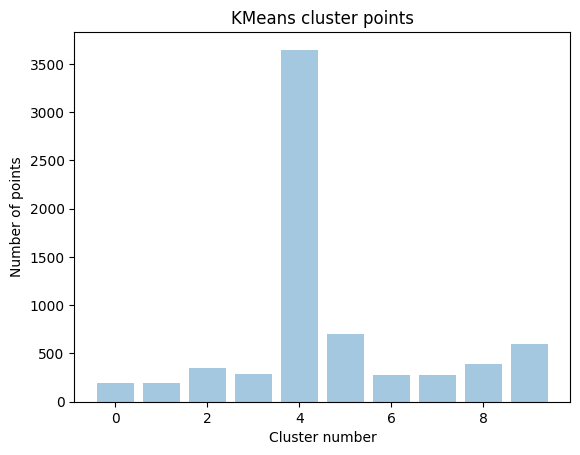

4 review of assigned to cluster  0
----------------------------------------------------------------------
sayl strand superb perform old stori


quit howev manag depress lead actor phone autobiograph perform


though goe anyon seen hunger cat peopl find littl new tasti perform vincent gallo lift tale cannib lust ordinari


______________________________________________________________________
4 review of assigned to cluster  1
----------------------------------------------------------------------
littl question seriou work import director someth new say flipflop courtship often reel play


noth movi work


got good organ charact work lot obviou polit insight littl room engag imagin filmmak nearli hour dissip length


______________________________________________________________________
4 review of assigned to cluster  2
----------------------------------------------------------------------
film one year best


one decent perform cast one clever line dialogu


best comedi concert movi 

In [17]:
#K-means Clustering using tf-idf

from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

#creating tf-idf vector
tfidf_r_vect = TfidfVectorizer()
tfidf_r = tfidf_r_vect.fit_transform(df_train['Cleaned_reviews'].values)
print(tfidf_r.shape)

#Trainign the model
model_tf_r = KMeans(n_clusters=10, random_state=99)
model_tf_r.fit(tfidf_r)

labels_tf = model_tf_r.labels_
cluster_center_tf=model_tf_r.cluster_centers_

#Getting feature names
terms1 = tfidf_r_vect.get_feature_names_out()

print(terms1[1:10])

#Getting silhouette score using euclidean distantce
silhouette_score_tf_r = metrics.silhouette_score(tfidf_r, labels_tf, metric='euclidean')

print(silhouette_score_tf_r)

df1 = df_train
df1['Tfidf Clus Label'] = model_tf_r.labels_
print(df1.head(5))
print(df1.groupby(['Tfidf Clus Label'])['Cleaned_reviews'].count())

#getting centroids
print("Top terms per cluster:")
order_centroids = model_tf_r.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms1[ind], end='')
        print()

# visually how points or reviews are distributed across 10 clusters

plt.bar([x for x in range(10)], df1.groupby(['Tfidf Clus Label'])['Cleaned_reviews'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

for i in range(10):
    print("4 review of assigned to cluster ", i)
    print("-" * 70)
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][5]]['Cleaned_reviews'])
    print('\n')
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][10]]['Cleaned_reviews'])
    print('\n')
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][20]]['Cleaned_reviews'])
    print('\n')
    print("_" * 70)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

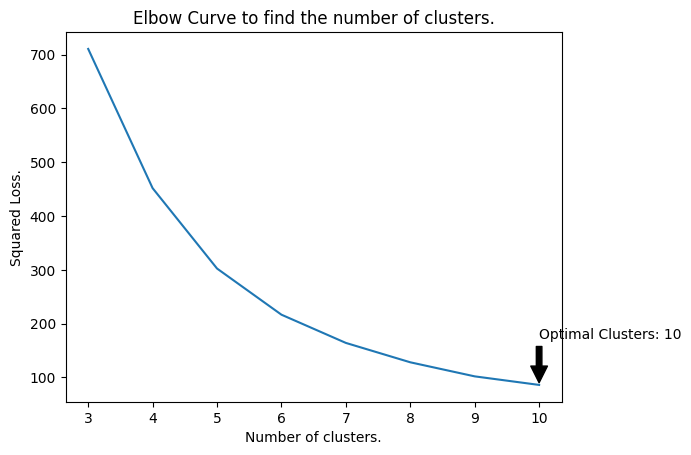

The optimal number of clusters obtained is: 10


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


A review of assigned to cluster  0
----------------------------------------------------------------------
fan film uniniti play better video sound turn


someth splendidlook particular film viewer expect someth special instead get lrb scifi rrb rehash


______________________________________________________________________
A review of assigned to cluster  1
----------------------------------------------------------------------
littl le extrem past longer exposit sequenc fewer gag break tedium


film moodi ooz chill heartwarm twist unpredict catandmous thriller


______________________________________________________________________
A review of assigned to cluster  2
----------------------------------------------------------------------
appar reassembl cuttingroom floor given daytim soap


slick engross melodrama


______________________________________________________________________
A review of assigned to cluster  3
--------------------------------------------------------------------

In [18]:
#Clustering using Word2Vec

from gensim.models import Word2Vec
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Tokenize the sentences
list_of_sent = [sent.split() for sent in df_train['Cleaned_reviews'].values]

# Training the Word2Vec model
w2v_model_r = Word2Vec(list_of_sent, workers=4)

#creating sentence vector
sent_vectors = []
for sent in list_of_sent:  # for each review/sentence
    sent_vec = np.zeros(100)  # Initialize vector
    cnt_words = 0  # Count of words with a valid vector in the sentence/review
    for word in sent:  # for each word in a review/sentence
        try:
            vec = w2v_model_r.wv[word]
            sent_vec += vec
            cnt_words += 1
        except KeyError:  # Handle if word not in vocabulary
            pass
    if cnt_words != 0:
        sent_vec /= cnt_words  # Calculate average
    sent_vectors.append(sent_vec)

	#converting to array
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)

# Determine the optimal number of clusters using the Elbow Method
num_clusters_r = range(3, 11)
squared_errors = []

#training using k-means
for cluster in num_clusters_r:
    kmeans = KMeans(n_clusters=cluster).fit(sent_vectors)
    squared_errors.append(kmeans.inertia_)

optimal_clusters = np.argmin(squared_errors) + 3

#Ploting elbow curve
plt.plot(num_clusters_r, squared_errors)
plt.title("Elbow Curve to find the number of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
plt.annotate(f"Optimal Clusters: {optimal_clusters}", xy=(optimal_clusters, min(squared_errors)), xytext=(optimal_clusters, min(squared_errors) * 2), arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

print("The optimal number of clusters obtained is:", optimal_clusters)

# Training the best model --
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters = optimal_clusters)
model2.fit(sent_vectors)

#creating clusters
word_cluster_pred=model2.predict(sent_vectors)
word_cluster_pred_2=model2.labels_
word_cluster_center=model2.cluster_centers_

word_cluster_center[1:2]

# Giving Labels/assigning a cluster to each point/text
dfa_r = df1
dfa_r['AVG-W2V Clus Label'] = model2.labels_
dfa_r.head(2)

# How many points belong to each cluster ->
dfa_r.groupby(['AVG-W2V Clus Label'])['Cleaned_reviews'].count()



# Reading a review which belong to each group.
for i in range(optimal_clusters):
    print("A review of assigned to cluster ", i)
    print("-" * 70)
    print(dfa_r.iloc[dfa_r.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Cleaned_reviews'])
    print('\n')
    print(dfa_r.iloc[dfa_r.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Cleaned_reviews'])
    print('\n')
    print("_" * 70)

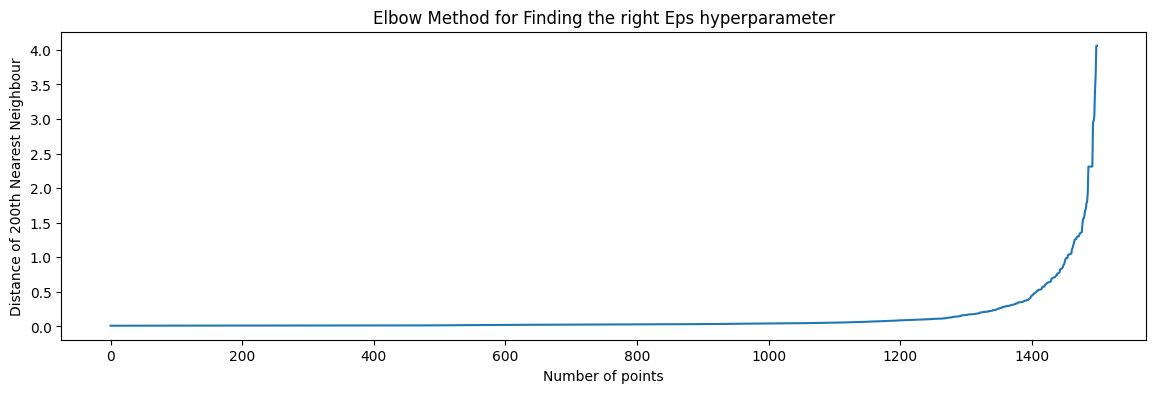

AVG-W2V Clus Label
0    6920
Name: Cleaned_reviews, dtype: int64

In [19]:
#Clustering using DBSCAN

from sklearn.cluster import DBSCAN

minPts = 2 * 100
# Lower bound function
def lower_bound_r(nums, target):
    l, r = 0, len(nums) - 1
    while l <= r: # Binary searching.
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l


# Computing 200th Nearest neighbour distance
def compute200thnearestneighbour_r(x, data):
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) # computing distances.
        if(len(dists) == 200 and dists[199] > dist):
            l = int(lower_bound_r(dists, dist))
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()

    return dists[199] # Dist 199 contains the distance of 200th nearest neighbour.

# Computing the 200th nearest neighbour
twohundrethneigh = []
for val in sent_vectors[:1500]:
    twohundrethneigh.append( compute200thnearestneighbour_r(val, sent_vectors[:1500]) )
twohundrethneigh.sort()
# Plotting for the Elbow Method :
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()



# Training DBSCAN :
model = DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model.fit(sent_vectors)

dfdb_r = dfa_r
dfdb_r['AVG-W2V Clus Label'] = model.labels_
dfdb_r.head(2)

dfdb_r.groupby(['AVG-W2V Clus Label'])['Cleaned_reviews'].count()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AVG-W2V Clus Label
0    1166
1    2167
2     565
3    1719
4    1303
Name: Cleaned_reviews, dtype: int64
2 reviews assigned to cluster  0
----------------------------------------------------------------------
appar reassembl cuttingroom floor given daytim soap


béart berl superb huppert magnific


______________________________________________________________________
2 reviews assigned to cluster  1
----------------------------------------------------------------------
stir funni final transport reimagin beauti beast 1930 horror film


visual stun rumin love memori histori war art commerc


______________________________________________________________________
2 reviews assigned to cluster  2
----------------------------------------------------------------------
bad


good offer desper ingrati perform


______________________________________________________________________
2 reviews assigned to cluster  3
----------------------------------------------------------------------
presum au

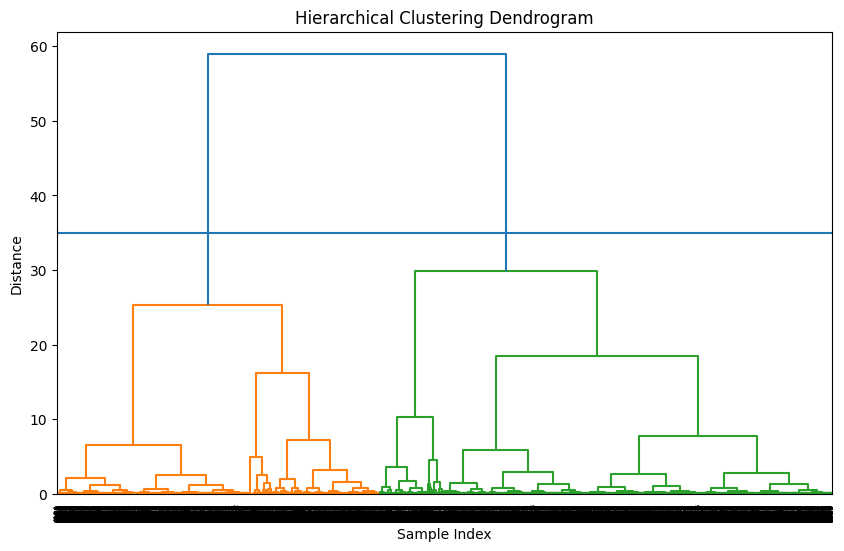

In [21]:
#Using Hierarchical Clustering

import scipy
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Visualizing dendrogram
plt.figure(figsize=(10, 6))
dendro = hierarchy.dendrogram(hierarchy.linkage(sent_vectors, method='ward'))
plt.axhline(y=35)  # Adjust the threshold for cutting the tree
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

# hierarchical clustering
cluster_r = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
Agg = cluster_r.fit_predict(sent_vectors)

# Giving Labels/assigning a cluster to each point/text
aggdfa = dfdb_r  # Replace 'dfdb' with your DataFrame
aggdfa['AVG-W2V Clus Label'] = cluster_r.labels_

# How many points belong to each cluster
print(aggdfa.groupby(['AVG-W2V Clus Label'])['Cleaned_reviews'].count())

# Reading a couple of reviews from each group
for i in range(5):
    print("2 reviews assigned to cluster ", i)
    print("-" * 70)
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Cleaned_reviews'])
    print('\n')
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Cleaned_reviews'])
    print('\n')
    print("_" * 70)

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


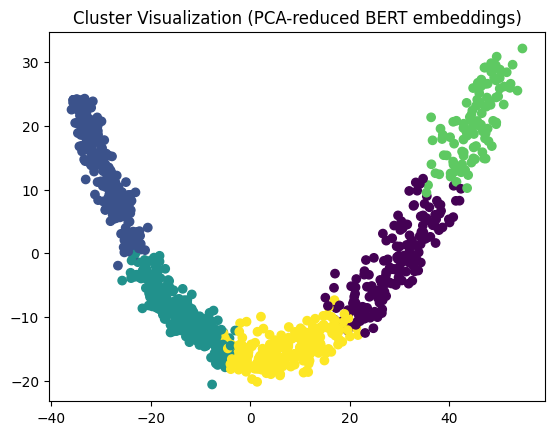

In [16]:
#Clustering using Bert

import pandas as pd
import numpy as np
from transformers import BertTokenizer, BertModel
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Tokenize and encode the text using BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
encoded_data = df_train['Cleaned_reviews'].head(1000).apply(lambda x: tokenizer.encode(x, add_special_tokens=True, truncation=True, max_length=128, padding='max_length'))

# Load BERT model
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Generate BERT embeddings
embeddings = []
for encoded_text in encoded_data:
    with torch.no_grad():
        outputs = bert_model(torch.tensor([encoded_text]))
        embeddings.append(outputs[0].numpy())

embeddings = np.array(embeddings).reshape(len(df_train.head(1000)), -1)

# Reduce dimensions using PCA
pca = PCA(n_components=50)  # Reduce to 50 dimensions (adjust as needed)
reduced_embeddings = pca.fit_transform(embeddings)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5)  # Specify number of clusters
cluster_labels = kmeans.fit_predict(reduced_embeddings)

# Visualize clusters in 2D (for demonstration purposes)
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Cluster Visualization (PCA-reduced BERT embeddings)')
plt.show()


In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.

In [ ]:
#You can write you answer here. (No code needed)
'''
The Elbow method was usedto determine the total and the optimal number of
clusters,K-means with TF-IDF is used and it has acheived in an optimal
number of 10 clusters. Remarkably, one cluster contained a substantial
proportion, approximately 3500 reviews, while the remaining clusters exhibited
an uneven distribution.DBSCAN clustering also exhibited similar behaivour,
showing higher number of elements in one cluster
In the hierarachical clustering, cluster three has the most number of elements.
However, while KMeans excelled in identifying top terms within
cluster centers, Bert also performs well for clustering as it is a large language
model.
'''
